
# DBSCAN Clustering – Full Demonstration  
## BY Ribka Mengiste   UGR/9680/15    Software Stream

**Machine Learning Lab: Density-Based Clustering**

This notebook provides a **comprehensive demonstration of the DBSCAN clustering algorithm**.

The same datasets and preprocessing steps are used to ensure consistency and fair comparison.



## 1. Introduction

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups points based on local point density rather than distance to a centroid.

Key characteristics:
- Does not require specifying the number of clusters
- Can discover arbitrarily shaped clusters
- Explicitly identifies noise and outliers


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA



## 2. Visualization Utility

A helper function is defined to visualize clustering results consistently across all datasets.
Noise points (label = -1) are shown using a distinct marker.


In [2]:

def plot_clusters(X, labels, title):
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            plt.scatter(X[labels == label, 0], X[labels == label, 1],
                        c='black', marker='x', label='Noise')
        else:
            plt.scatter(X[labels == label, 0], X[labels == label, 1],
                        label=f'Cluster {label}')
    plt.title(title)
    plt.legend()
    plt.show()



## 3. Dataset 1: Spherical Blobs

This dataset is well-suited for centroid-based clustering, but is also used here to evaluate how DBSCAN behaves on compact, well-separated clusters.


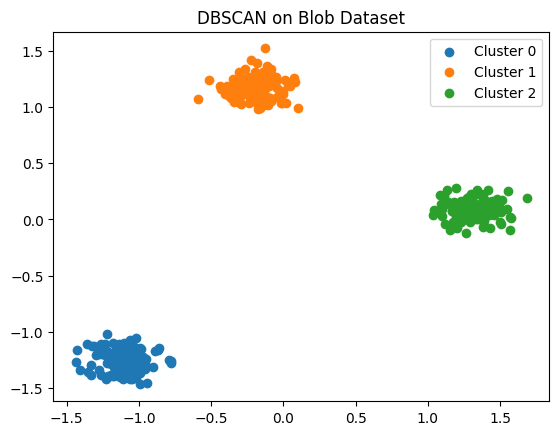

In [3]:

X_blobs, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.6, random_state=42)
X_blobs = StandardScaler().fit_transform(X_blobs)

dbscan_blobs = DBSCAN(eps=0.3, min_samples=5)
labels_blobs = dbscan_blobs.fit_predict(X_blobs)

plot_clusters(X_blobs, labels_blobs, "DBSCAN on Blob Dataset")



### Observation
DBSCAN successfully identifies dense regions, although parameter selection plays a critical role in separating clusters correctly.



## 4. Dataset 2: Moons (Non-Linear Shape)

The moons dataset demonstrates DBSCAN’s ability to identify clusters with non-spherical, curved structures.


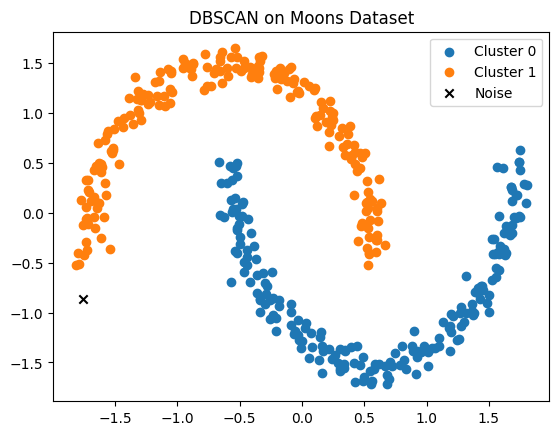

In [4]:

X_moons, _ = make_moons(n_samples=400, noise=0.05, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)

labels_moons = DBSCAN(eps=0.25, min_samples=5).fit_predict(X_moons)
plot_clusters(X_moons, labels_moons, "DBSCAN on Moons Dataset")



### Observation
Unlike K-Means, DBSCAN correctly follows the curved shape of the data without forcing spherical clusters.



## 5. Dataset 3: Circles (Nested Clusters)

This dataset contains concentric circular structures, which are challenging for distance-based algorithms.


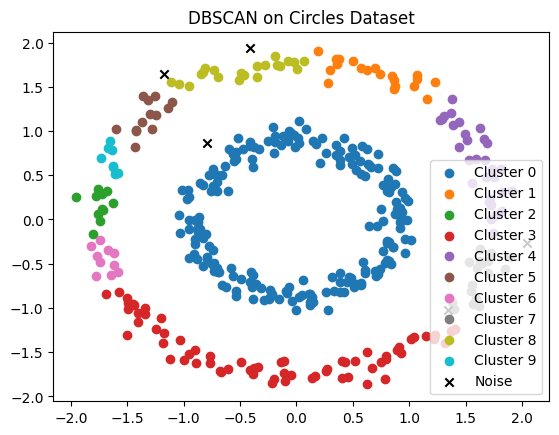

In [5]:

X_circles, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)
X_circles = StandardScaler().fit_transform(X_circles)

labels_circles = DBSCAN(eps=0.2, min_samples=5).fit_predict(X_circles)
plot_clusters(X_circles, labels_circles, "DBSCAN on Circles Dataset")



### Observation
DBSCAN successfully separates nested clusters, highlighting its advantage over centroid-based methods.



## 6. Effect of Parameter Selection

DBSCAN relies heavily on two parameters:
- **eps**: neighborhood radius
- **min_samples**: minimum points required to form a dense region

Improper parameter choices can result in excessive noise or merged clusters.


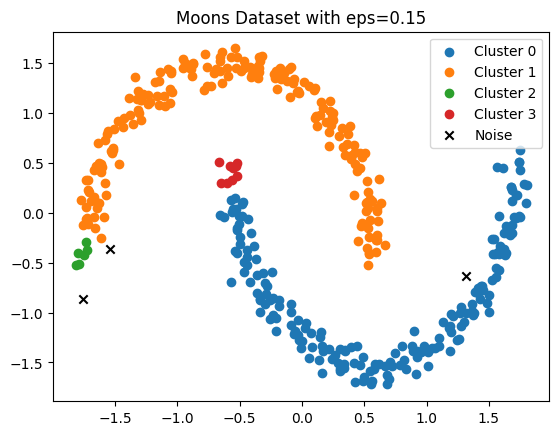

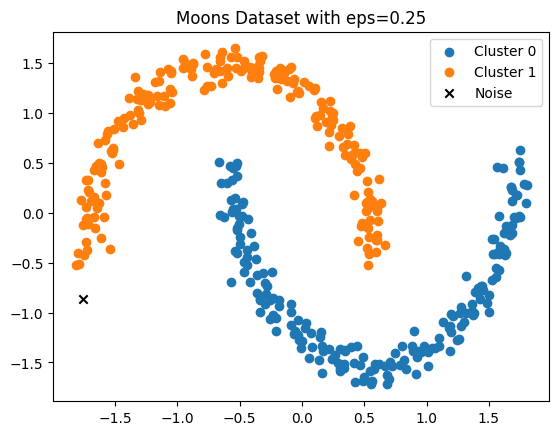

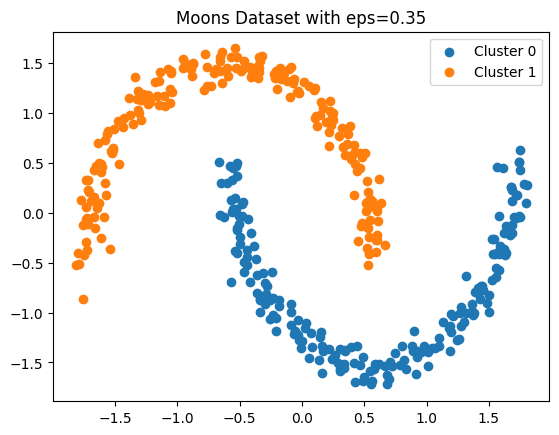

In [6]:

for eps in [0.15, 0.25, 0.35]:
    labels = DBSCAN(eps=eps, min_samples=5).fit_predict(X_moons)
    plot_clusters(X_moons, labels, f"Moons Dataset with eps={eps}")



## 7. High-Dimensional Dataset

DBSCAN is also applied to a high-dimensional dataset.
Since visualization is difficult in higher dimensions, PCA is used for dimensionality reduction.


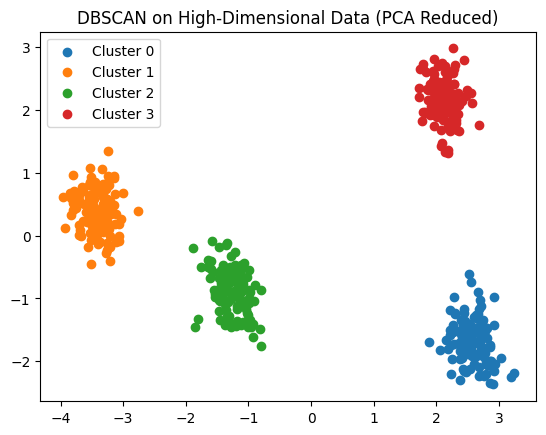

In [7]:

X_high, _ = make_blobs(n_samples=500, centers=4, n_features=10, random_state=42)
X_high = StandardScaler().fit_transform(X_high)

dbscan_high = DBSCAN(eps=1.5, min_samples=10)
labels_high = dbscan_high.fit_predict(X_high)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_high)

plot_clusters(X_reduced, labels_high, "DBSCAN on High-Dimensional Data (PCA Reduced)")



## 8. Strengths and Limitations

### Strengths
- No need to predefine number of clusters
- Detects noise explicitly
- Works well with arbitrarily shaped clusters

### Limitations
- Sensitive to parameter selection
- Struggles with varying densities
- Computationally expensive for large datasets



## 9. Summary

This notebook demonstrated DBSCAN clustering using the same datasets and experimental structure as the K-Means clustering lab.

The results show that DBSCAN is particularly effective for non-linear and irregular cluster shapes, making it a strong alternative to centroid-based methods in appropriate scenarios.
